<a href="https://colab.research.google.com/github/pi-mishra/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Zomato Restaurant Clustering and Sentiment Analysis
Project Type - UnSupervised Machine Learning

# Data Description

## Restaurants Data

* Name - Name of the restaurants
* Links - URL links of restaurants
* Cost - Per person estimated cost of dining
* Collection- Tagging of restaurants w.r.t Zomato categories
* Cuisines- Cuisines served by restaurants
* Timings - Restaurants timings

## Review Data

* Reviewer - Name of the reviewer
* review - Review text
* Rating - Rating provided
* MetaData - Reviewer metadata-No of reviews and followers
* Time - Data and time of review
* Pictures - No of pictures posted with review

# Knowing the data

### Importing Packages

In [1]:
#importing all important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
import time
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})


import re
import missingno as msno #for visualizing null values


## Loading Dataset

In [2]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#restaurant data
restaurant_df = pd.read_csv('/content/drive/MyDrive/ZomatoProject/Zomato Restaurant names and Metadata.csv')

#review data
review_df = pd.read_csv('/content/drive/MyDrive/ZomatoProject/Zomato Restaurant reviews.csv')

## Dataset First View

In [4]:
# restaurnat dataset first look

restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
# review dataset first look

review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [6]:
# rows and features of the df

print(f'Rows and features of restaurants dataframe {restaurant_df.shape}')
print(f'Rows and features of review dataframe {review_df.shape}')

Rows and features of restaurants dataframe (105, 6)
Rows and features of review dataframe (10000, 7)


## Dataset Information

In [7]:
# dataset info

print('Restaurant df Info')
restaurant_df.info()
print("\n")
print("-" * 50)
print("\n")
print('Review df Info')
review_df.info()

Restaurant df Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


--------------------------------------------------


Review df Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Picture

## Checking for duplicates

In [8]:
# duplicates

print('Restaurant df')
print(restaurant_df.duplicated().value_counts())
print("-" * 50)
print('Review df')
print(review_df.duplicated().value_counts())

Restaurant df
False    105
dtype: int64
--------------------------------------------------
Review df
False    9964
True       36
dtype: int64


In [9]:
# getting duplicate values

print(f'Duplicate values = {review_df[review_df.duplicated()].shape[0]}')
review_df[review_df.duplicated()]

Duplicate values = 36


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In [10]:
# checking shape of the duplicate values

print(f"shape of American Wild Wings = {review_df[review_df['Restaurant'] == 'American Wild Wings'].shape}")
print(f"shape of Arena Eleven = {review_df[review_df['Restaurant'] == 'Arena Eleven'].shape}")

shape of American Wild Wings = (100, 7)
shape of Arena Eleven = (100, 7)


## Cheking for null values

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


<Axes: >

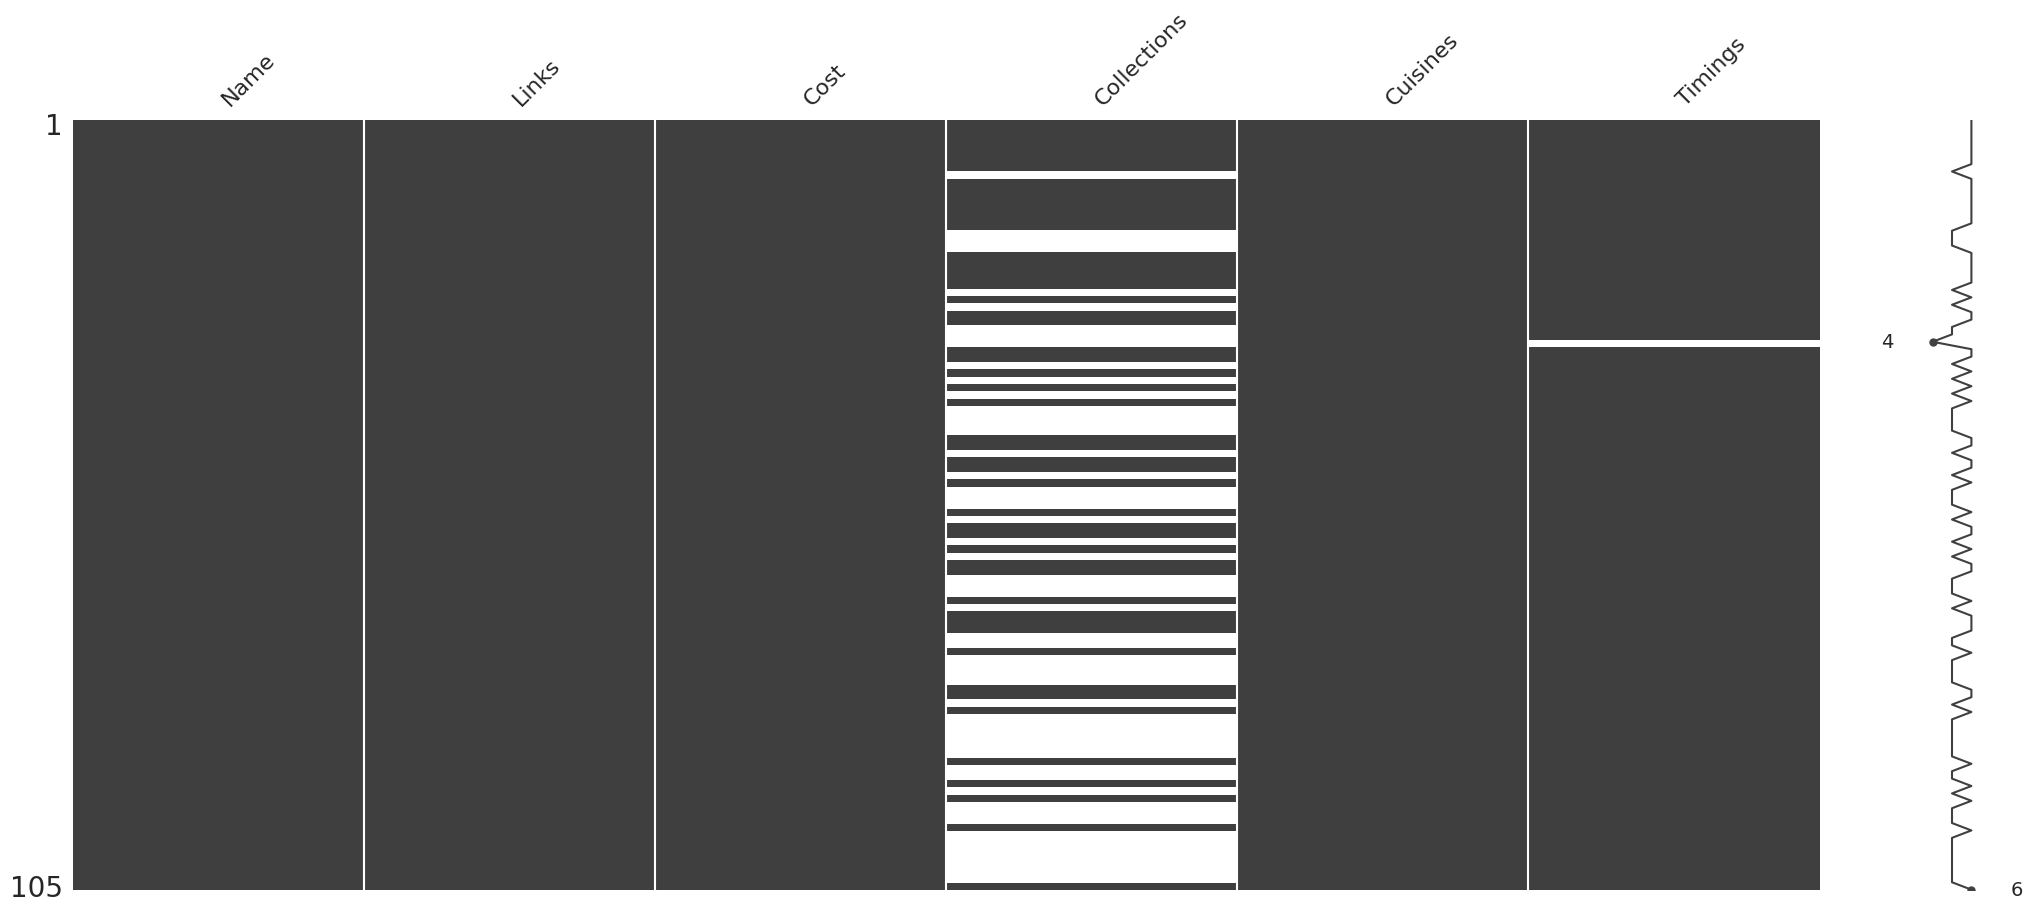

In [11]:
#restaurant data null values

print(restaurant_df.isnull().sum())

msno.matrix(restaurant_df)

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


<Axes: >

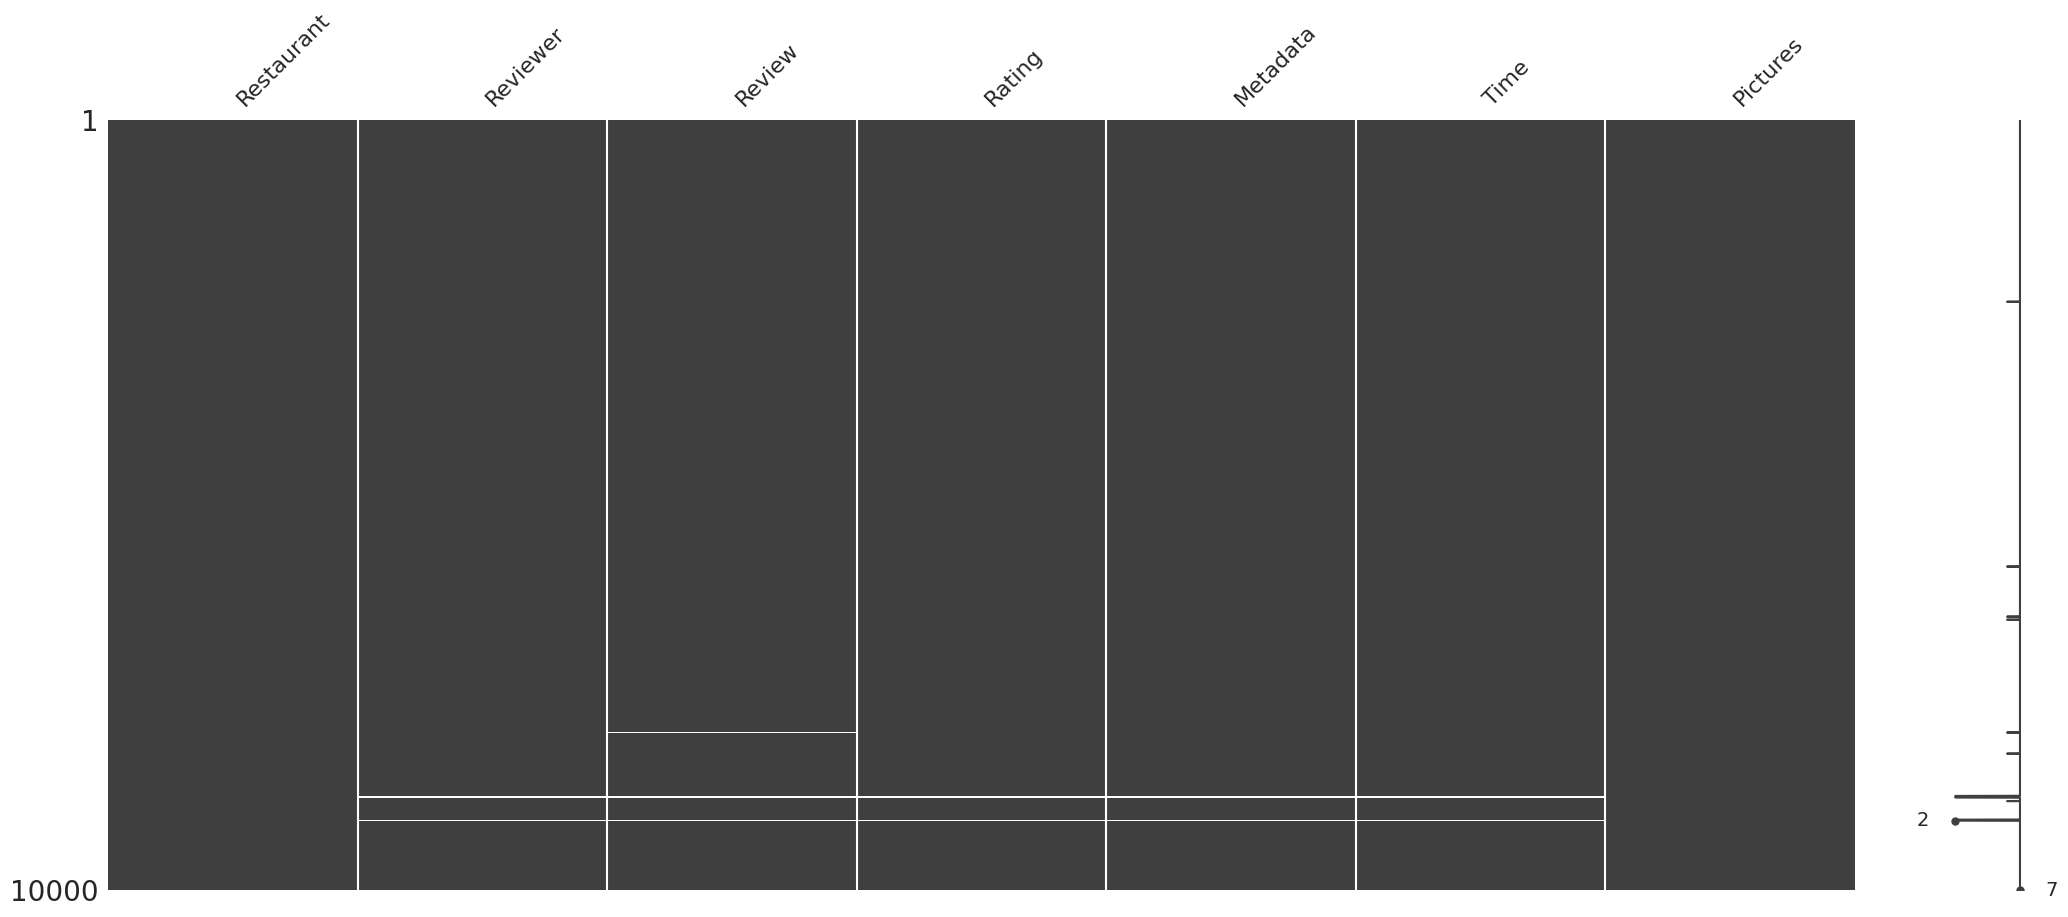

In [12]:
#review data null values

print(review_df.isnull().sum())

msno.matrix(review_df)

## Observations


**Restaurants Data**

*  There are 105 rows and 6 features.
*  Feature cost is in object type but should be in int.
*  There are no duplicate values.
*  There are null values in timing and collection features.



---



**Review Data**
*  There are 1000 rows and 7 features
*  There are 36 dublicate rows
*  Only restaurnat and photo have 0 null values.


# 2.Understanding your variables

In [13]:
# Column name of dataframes

print(f'Restaurnt data features: {restaurant_df.columns.to_list()}')
print(f'Review data features: {review_df.columns.to_list()}')

Restaurnt data features: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Review data features: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [14]:
# describing the restaurant dataframe

restaurant_df.describe(include= 'all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [15]:
# describing the review dataframe

review_df.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


## Checking unique values of each list

In [16]:
# unique values in restaurant df

for i in restaurant_df.columns.to_list():
  print("Number of unique values in",i,'=',restaurant_df[i].nunique())

Number of unique values in Name = 105
Number of unique values in Links = 105
Number of unique values in Cost = 29
Number of unique values in Collections = 42
Number of unique values in Cuisines = 92
Number of unique values in Timings = 77


In [17]:
# unique values in review df

for i in review_df.columns.to_list():
  print("Number of unique values in",i,'=',review_df[i].nunique())

Number of unique values in Restaurant = 100
Number of unique values in Reviewer = 7446
Number of unique values in Review = 9364
Number of unique values in Rating = 10
Number of unique values in Metadata = 2477
Number of unique values in Time = 9782
Number of unique values in Pictures = 36


# 3. Data Wrangling

In [18]:
# creating copy of both data

restaurant = restaurant_df.copy()
review = review_df.copy()

## Restaurant

In [19]:
#checking values of cost before changing dtype

restaurant['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [20]:
restaurant['Cost'] = restaurant['Cost'].str.replace(',', '').astype('int64')

# Getting the top 5 most expensive restaurant

restaurant.sort_values('Cost',ascending= False)[['Name','Cost']][0:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [21]:
# Getting the top 5 budget friendly restaurant

restaurant.sort_values('Cost',ascending=False)[['Name','Cost']][-5:]

,Name,Cost
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


In [22]:
restaurant['Cost'].values

array([ 800,  800, 1300,  800, 1200, 1500,  500,  300, 1000,  350,  400,
       1600,  750, 1300, 1500,  500,  550,  400, 1900,  400,  450, 1900,
       1600,  150, 1400, 1000, 1300, 1100,  600,  200,  900, 1000,  700,
        900, 1700,  700,  700,  500, 1200,  700, 1200,  500,  600,  500,
       1000,  900, 1400,  800,  500,  500,  800,  500,  500, 1200,  200,
        700, 2500,  450,  350,  200, 1200, 1200,  500,  850,  600, 1500,
        750, 1200, 1500, 1500, 1100, 1300, 1000,  600,  600,  700,  350,
        650, 1100,  700,  500,  600,  750,  500,  700,  200,  600,  600,
        400,  150, 1600, 1800, 2800,  550,  550,  400,  600, 1750,  400,
       1000,  600,  200,  500,  250, 1700])

In [23]:
#restaurnts that share the same price

restaurant_dict = {}
amount = restaurant.Cost.values.tolist()

#adding restaurnt name based on the price by converting it into list

for price in amount:
  rows = restaurant[restaurant.Cost == price]
  restaurant_dict[price] = rows["Name"].to_list()

same_restaurant_price= pd.DataFrame.from_dict([restaurant_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})

restaurant_count = restaurant.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_restaurant_price = same_restaurant_price.merge(restaurant_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price
same_restaurant_price.sort_values('Total_Restaurant', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [24]:
#restaurnt which has max price
same_restaurant_price.sort_values('Cost', ascending = False)[:5]

,Cost,Name of Restaurants,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [25]:
# spliting the cusines and storing in list
cuisine_value_list = restaurant_df.Cuisines.str.split(', ')

In [26]:
# storing all the cusines in a dict
cuisine_dict = {}

for i in cuisine_value_list:
  for j in i:
    if j in cuisine_dict:
      cuisine_dict[j]+=1
    else:
      cuisine_dict[j]=1

In [27]:
#creating df from the dictionary

cuisine_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [28]:
#top 5 cuisines

cuisine_df.sort_values('Number of Restaurants', ascending= False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [29]:
#splitting the collection and storing it into a list

collection_list = restaurant_df.Collections.dropna().str.split(', ')

In [30]:
# storing all the cusines in a dict

collection_dict = {}

for i in collection_list:
  for j in i:
    if j in collection_dict:
      collection_dict[j]+=1
    else:
      collection_dict[j]=1

In [31]:
#converting the dict into a dataframe

collection_df = pd.DataFrame.from_dict([collection_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [32]:
#top 5 collections

collection_df.sort_values('Number of Restaurants',ascending=False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


## Review

In [33]:
#checking rating column

review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [34]:
#rating column in int, needs to changed to float
#there is a like rating it will be changed to 0 then to median as it is catagorical

review.loc[review['Rating']=='Like'] = 0
review['Rating'] = review['Rating'].astype('float')

review.loc[review['Rating']== 0] = review.Rating.median()

In [35]:
#creating new features

#extracting total_review and followers from metadata into 2 individual columns
review['Reviewer_Total_Review'] =review['Metadata'].str.split(',').str[0]
review['Reviewer_Followers'] = review['Metadata'].str.split(',').str[1]

#extracting only the numbers from the extracted columns
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])

#converting the time column to datetime and extracting
review['Time']=pd.to_datetime(review['Time'])
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour

In [36]:
#Average engagement of restaurants
avg_restaurant_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_restaurant_rating


,Restaurant,Rating,Total_Review
0,4.0,4.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [37]:
#usless data
review[review['Restaurant'] == 4.0]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,4.0,4.0,4.0,4.0,4.0,1970-01-01 00:00:00.000000004,4,NaN,NaN,1970.0,1.0,0.0


In [38]:
#checking hotel count as total hotel in restaurant data was 105
review.Restaurant.nunique()

101

In [39]:
#finding restaurant without review
restaurant_without_review = [name for name in restaurant.Name.unique().tolist()
       if name not in review.Restaurant.unique().tolist()]
restaurant_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [40]:
# top 5 highest rated restaurant

avg_restaurant_rating.sort_values('Rating',ascending=False)[:5]

,Restaurant,Rating,Total_Review
4,AB's - Absolute Barbecues,4.88,100
12,B-Dubs,4.81,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
68,Paradise,4.70,100
36,Flechazo,4.66,100


In [41]:
# top 5 lowest rated restaurant

avg_restaurant_rating.sort_values('Rating',ascending=True)[:5]

,Restaurant,Rating,Total_Review
42,Hotel Zara Hi-Fi,2.400,100
11,Asian Meal Box,2.580,100
67,Pakwaan Grand,2.710,100
58,Mathura Vilas,2.820,100
15,Behrouz Biryani,2.825,100


In [42]:
#Finding the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5464,Satwinder Singh,186.0,13410.0,3.666667
1702,Eat_vth_me,60.0,13320.0,5.000000
5236,Samar Sardar,8.0,11329.0,3.500000
1788,Foodies Hyderabad,31.0,9494.0,4.500000
6230,Srinivas,34.0,7628.0,3.714286


In [43]:
# finding which year has maximum engagement

restaurant_year= review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.to_list()).reset_index()
restaurant_year['Count'] = restaurant_year['Restaurant'].apply(lambda x: len(x))
restaurant_year.sort_values("Count",ascending = False)

,Review_Year,Restaurant,Count
3,2018.0,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4903
4,2019.0,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4802
2,2017.0,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
1,2016.0,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
0,1970.0,[4.0],1


In [44]:
#merge dataframe
restaurant = restaurant.rename(columns={'Name':'Restaurant_Name'})
review = review.rename(columns={'Restaurant':'Restaurant_Name'})
merged = restaurant.merge(review, on ='Restaurant_Name')
merged.shape

(9999, 17)

In [45]:
# price point of restaurants

price_point = merged.groupby('Restaurant_Name').agg({'Cost':'mean','Rating':'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})

# price point of top 5 highly rated restaurants
price_point.sort_values('Rating',ascending=False)[:5]

,Restaurant_Name,Price_Point,Rating
3,AB's - Absolute Barbecues,1500.0,4.88
11,B-Dubs,1600.0,4.81
2,"3B's - Buddies, Bar & Barbecue",1100.0,4.76
67,Paradise,800.0,4.70
35,Flechazo,1300.0,4.66


In [46]:
# price point of top 5 lowest rated restaurants
price_point.sort_values('Rating',ascending=True)[:5]

,Restaurant_Name,Price_Point,Rating
41,Hotel Zara Hi-Fi,400.0,2.400
10,Asian Meal Box,200.0,2.580
66,Pakwaan Grand,400.0,2.710
57,Mathura Vilas,500.0,2.820
14,Behrouz Biryani,600.0,2.825


In [47]:
#reviewer rating count

rating_count = pd.DataFrame(review.groupby('Reviewer').size(),columns=['Rating_Count'])
rating_count.sort_values('Rating_Count', ascending = False)[:5]

,Rating_Count
Reviewer,
Parijat Ray,13
Ankita,13
Kiran,12
Vedant Killa,11
Jay Mehta,11


## Manipulations done and insights found-

* First we created dublicates of both the dataframe.
* Converting the cost to int64 and getting the top 5 most expensive restaurants. The most expensive was Collage - Hyatt Hyderabad Gachibowli.
* Getting the top 5 budget friendly restaurant . The most budgetfriendly was momo delight.
* We have created dataframe grouping restaurants with same cost and calculating total restaurants with same cost. We found there are maximum restaurants at 500rs i.e 13 restaurants.
* We have created dataframe consisting of crusines and number of restaurants. North indian cuisine is available in maximum number of restaurants.



# *4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*

**Chart - 1 Distplot for Distribution**

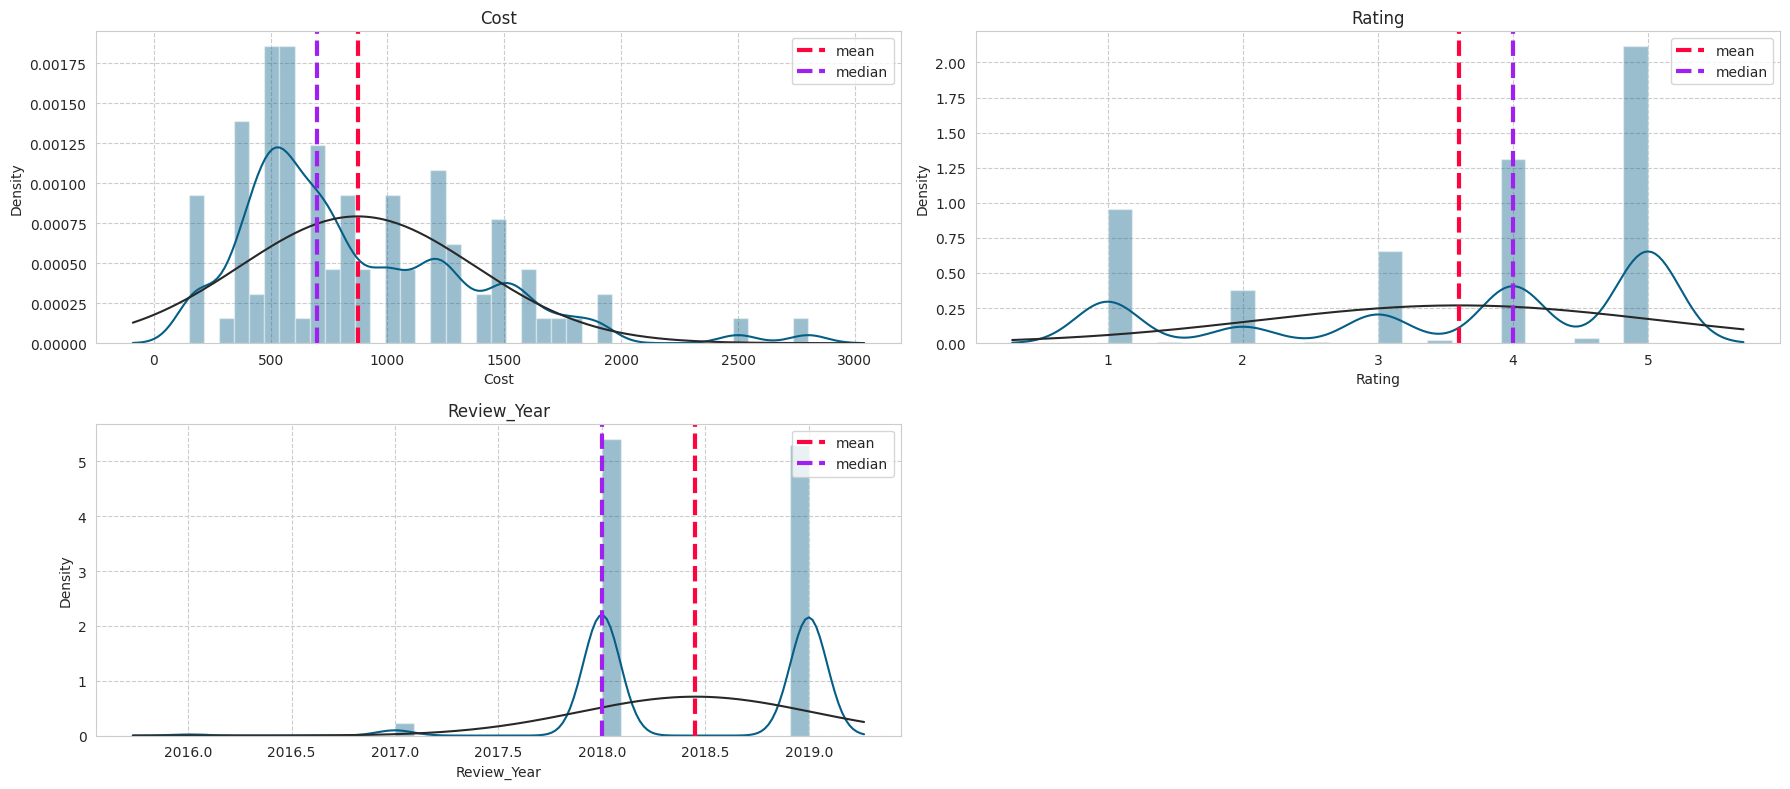

In [48]:
# Chart - 1 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

Distplot is helpful in understanding the distribution of the feature.

Insights found-
* All the three feature are skewed
* Maximum restaurnats has price point at 500
* 2018 has maximum number of reviews



**Chart-2 Maximum Engagement and Lowest Engagement**







In [49]:
#geting the top 10 hotel that show maximum engagement
most_engaged_restaurant = price_point.sort_values('Rating', ascending = False)

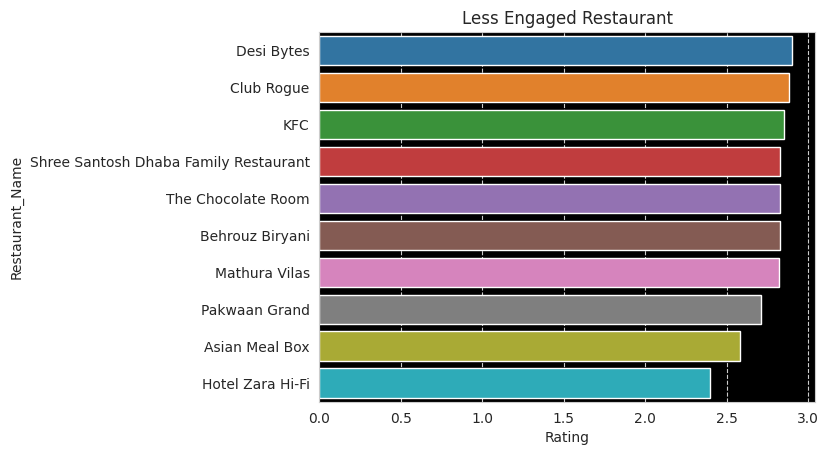

In [50]:
#chart for less liked restauranats
fig, ax = plt.subplots()
sns.barplot(data = most_engaged_restaurant[-10:], x = 'Rating', y = 'Restaurant_Name')
plt.title('Less Engaged Restaurant')
ax.set_facecolor("black")
plt.show()

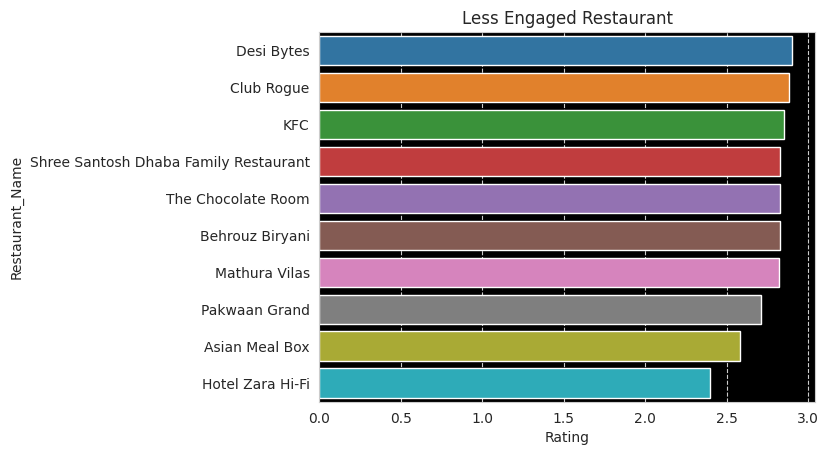

In [51]:
#chart for less liked restauranats
fig, ax = plt.subplots()
sns.barplot(data = most_engaged_restaurant[-10:], x = 'Rating', y = 'Restaurant_Name')
plt.title('Less Engaged Restaurant')
ax.set_facecolor("black")
plt.show()

Barplot was used to show the frequency of the features.

Insights found-


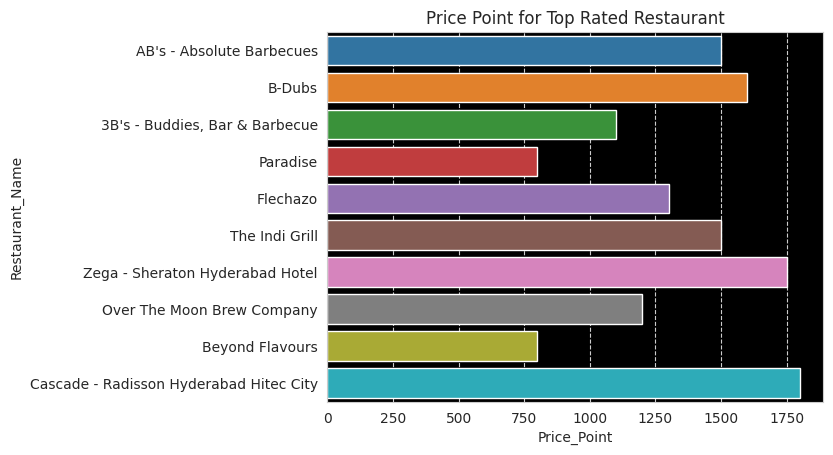

In [52]:
fig, ax = plt.subplots()
sns.barplot(data = most_engaged_restaurant[:10], x = 'Price_Point', y = 'Restaurant_Name', ax=ax)
plt.title('Price Point for Top Rated Restaurant')
ax.set_facecolor("black")
plt.show()

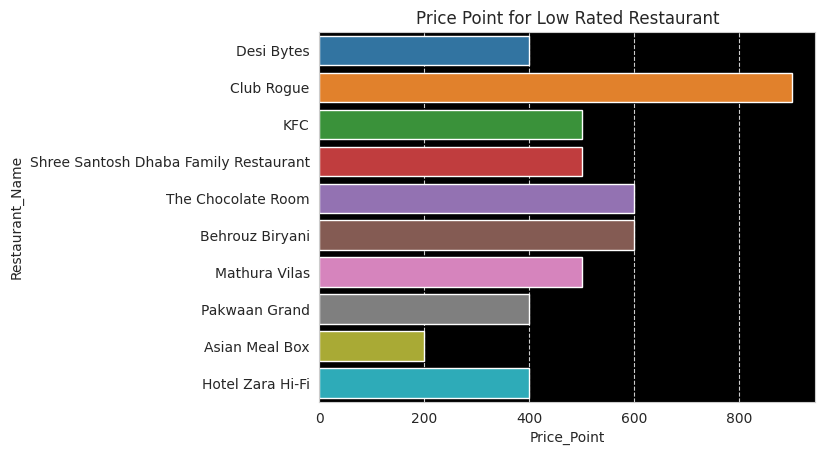

In [53]:
fig, ax = plt.subplots()
sns.barplot(data = most_engaged_restaurant[-10:], x = 'Price_Point', y = 'Restaurant_Name', ax=ax)
plt.title('Price Point for Low Rated Restaurant')
ax.set_facecolor("black")
plt.show()

Commoditized Cuisine

Chart - 4 Proportion of Cuisine Sold by Most Restaurant


In [54]:
#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

In [55]:
cuisine_list

['North Indian', 'Chinese', 'Continental', 'Biryani', 'Fast Food']

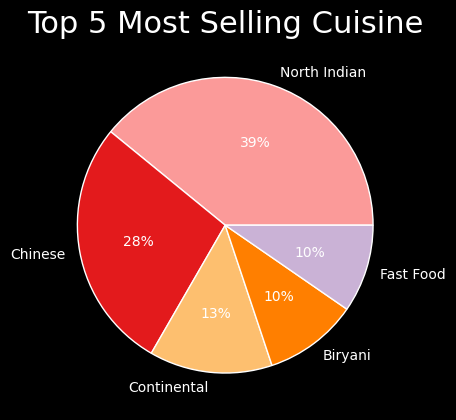

In [56]:
# Chart - 4 visualization code pie chart for top 5 mpst selling cuisine
plt.figure(facecolor='black')
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'color': 'white'})
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'white')
plt.show()

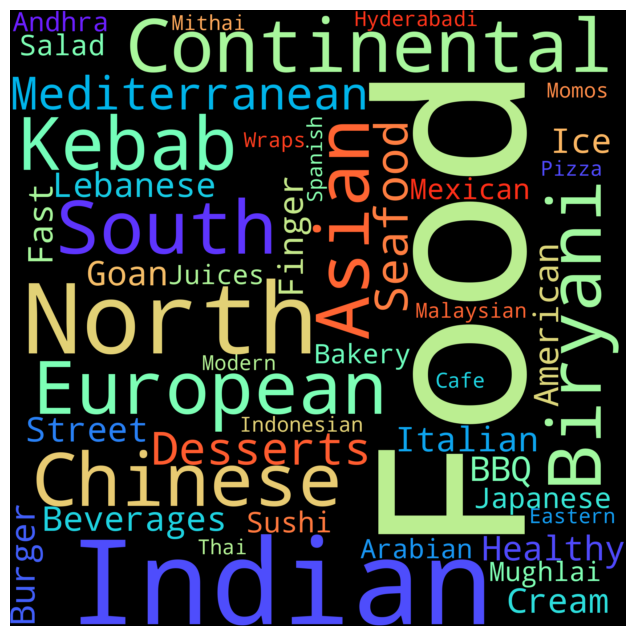

In [57]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

**Chart-5 Most used tags**

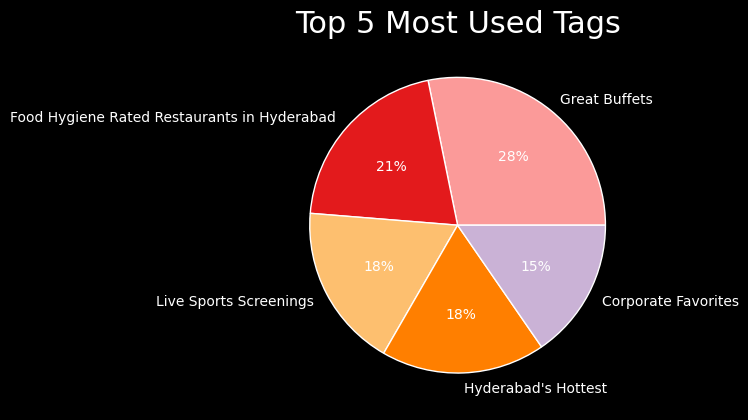

In [58]:
collection_list= collection_df.sort_values('Number of Restaurants', ascending=False)["Tags"].to_list()[:5]

# Chart - 4 visualization code pie chart for top 5 mpst selling cuisine
plt.figure(facecolor='black')
data = collection_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = collection_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%',textprops={'color': 'white'})
plt.title('Top 5 Most Used Tags', size =22, color= 'white')
plt.show()

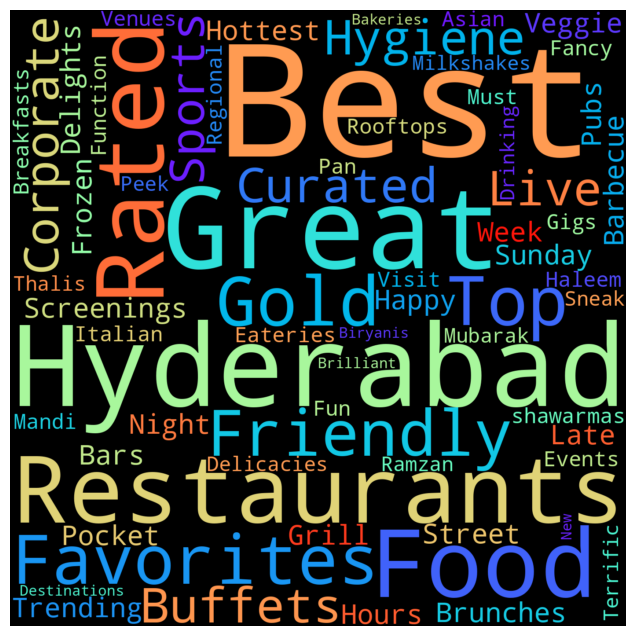

In [59]:
#wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in collection_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False,
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

Most Popular Critic

Chart - 6 Learn about Reviewers

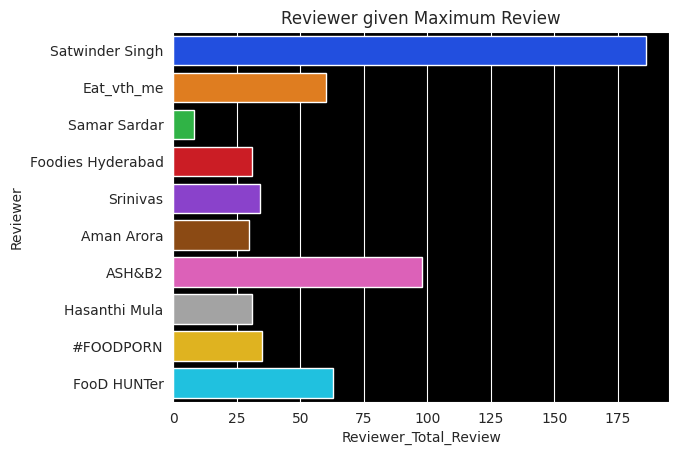

In [60]:
# Set the background color to black
sns.set_style('darkgrid')

# Create the barplot
sns.barplot(data=most_followed_reviewer[:10], x='Reviewer_Total_Review', y='Reviewer', palette='bright')

# Add a title
plt.title('Reviewer given Maximum Review')

# Set the background color to black
plt.gca().set_facecolor('black')

# Show the plot
plt.show()

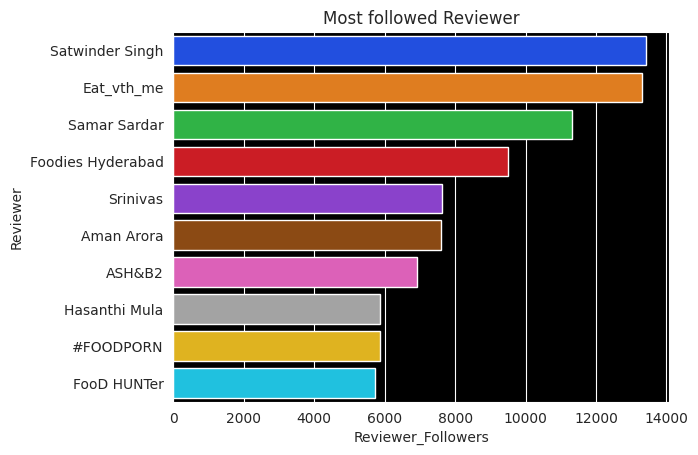

In [61]:
# Set the background color to black
sns.set_style('darkgrid')

# visualization code for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers',
            y = 'Reviewer',palette='bright')

# Set the background color to black
plt.gca().set_facecolor('black')

plt.title('Most followed Reviewer')
plt.show()

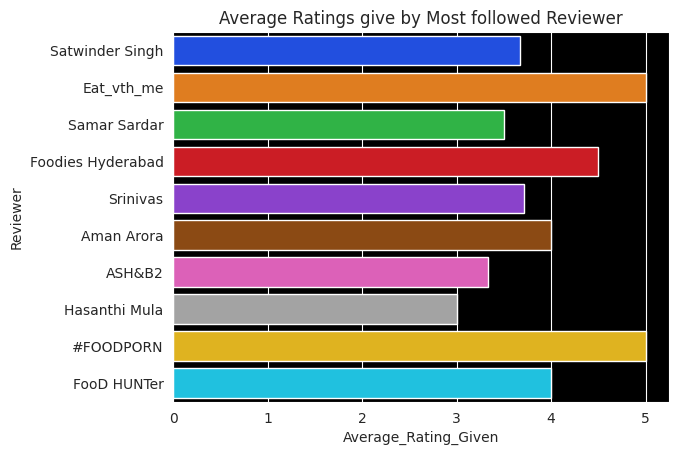

In [62]:
# Set the background color to black
sns.set_style('darkgrid')

# visualization code for average rating given by most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given',
            y = 'Reviewer',palette='bright')
# Set the background color to black
plt.gca().set_facecolor('black')

plt.title('Average Ratings give by Most followed Reviewer')
plt.show()

Most Expensive Restaurant


Chart - 7 Hotel with Highest Price and Lowest Price


In [63]:
#extracting name and price

price_of_restaurant = restaurant.sort_values('Cost', ascending = False)[['Restaurant_Name','Cost']]

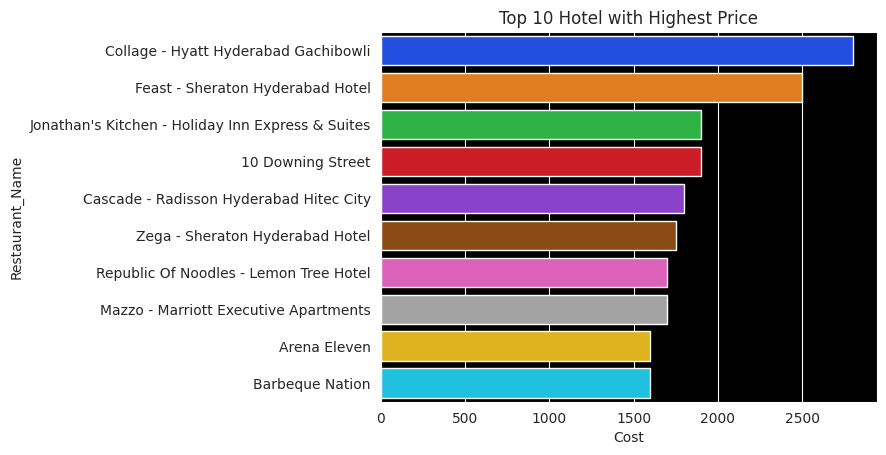

In [64]:
# Set the background color to black
sns.set_style('darkgrid')

# Chart - 7 visualization code for howtel with maximum price
sns.barplot(data = price_of_restaurant[:10], x = "Cost", y='Restaurant_Name', palette = 'bright')

# Set the background color to black
plt.gca().set_facecolor('black')

plt.title('Top 10 Hotel with Highest Price')
plt.show()

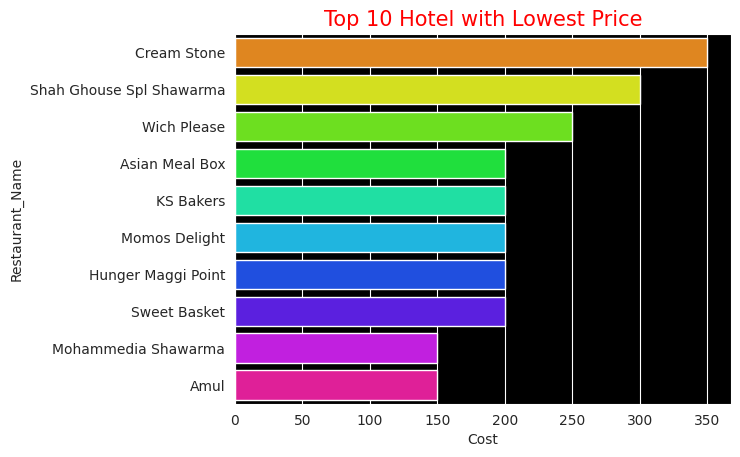

In [65]:
# Set the background color to black
sns.set_style('darkgrid')

#hotel with lowest price
sns.barplot(data = price_of_restaurant[-10:], x = "Cost", y='Restaurant_Name', palette = 'hsv')

# Set the background color to black
plt.gca().set_facecolor('black')

plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()

Chart -7 Coorelation heatmap

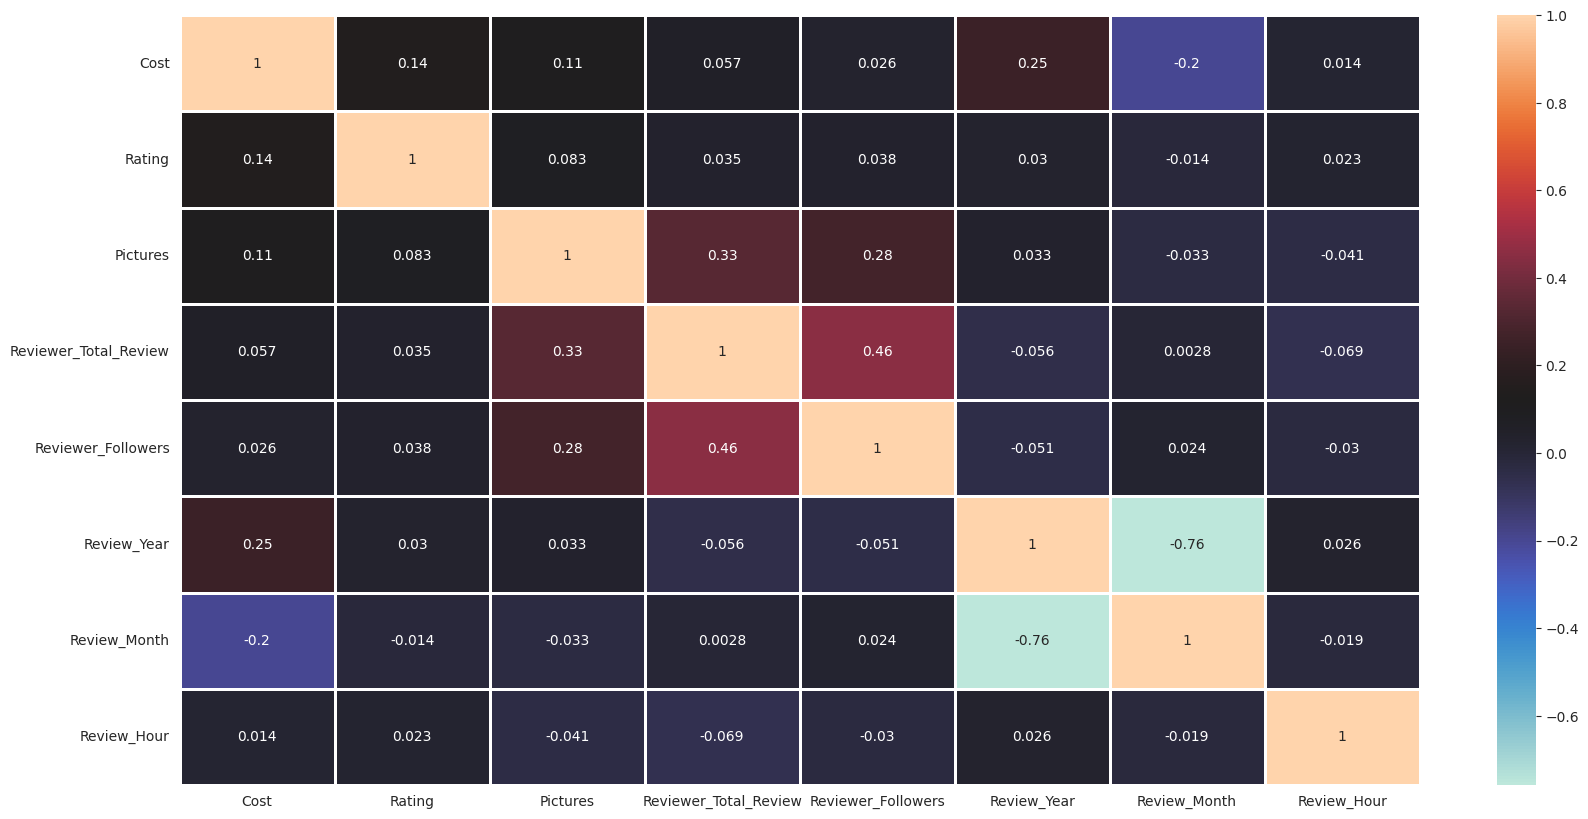

In [66]:
# Correlation Heatmap visualization code
# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(merged.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

plt.show()

Chart-8 Pair Plot

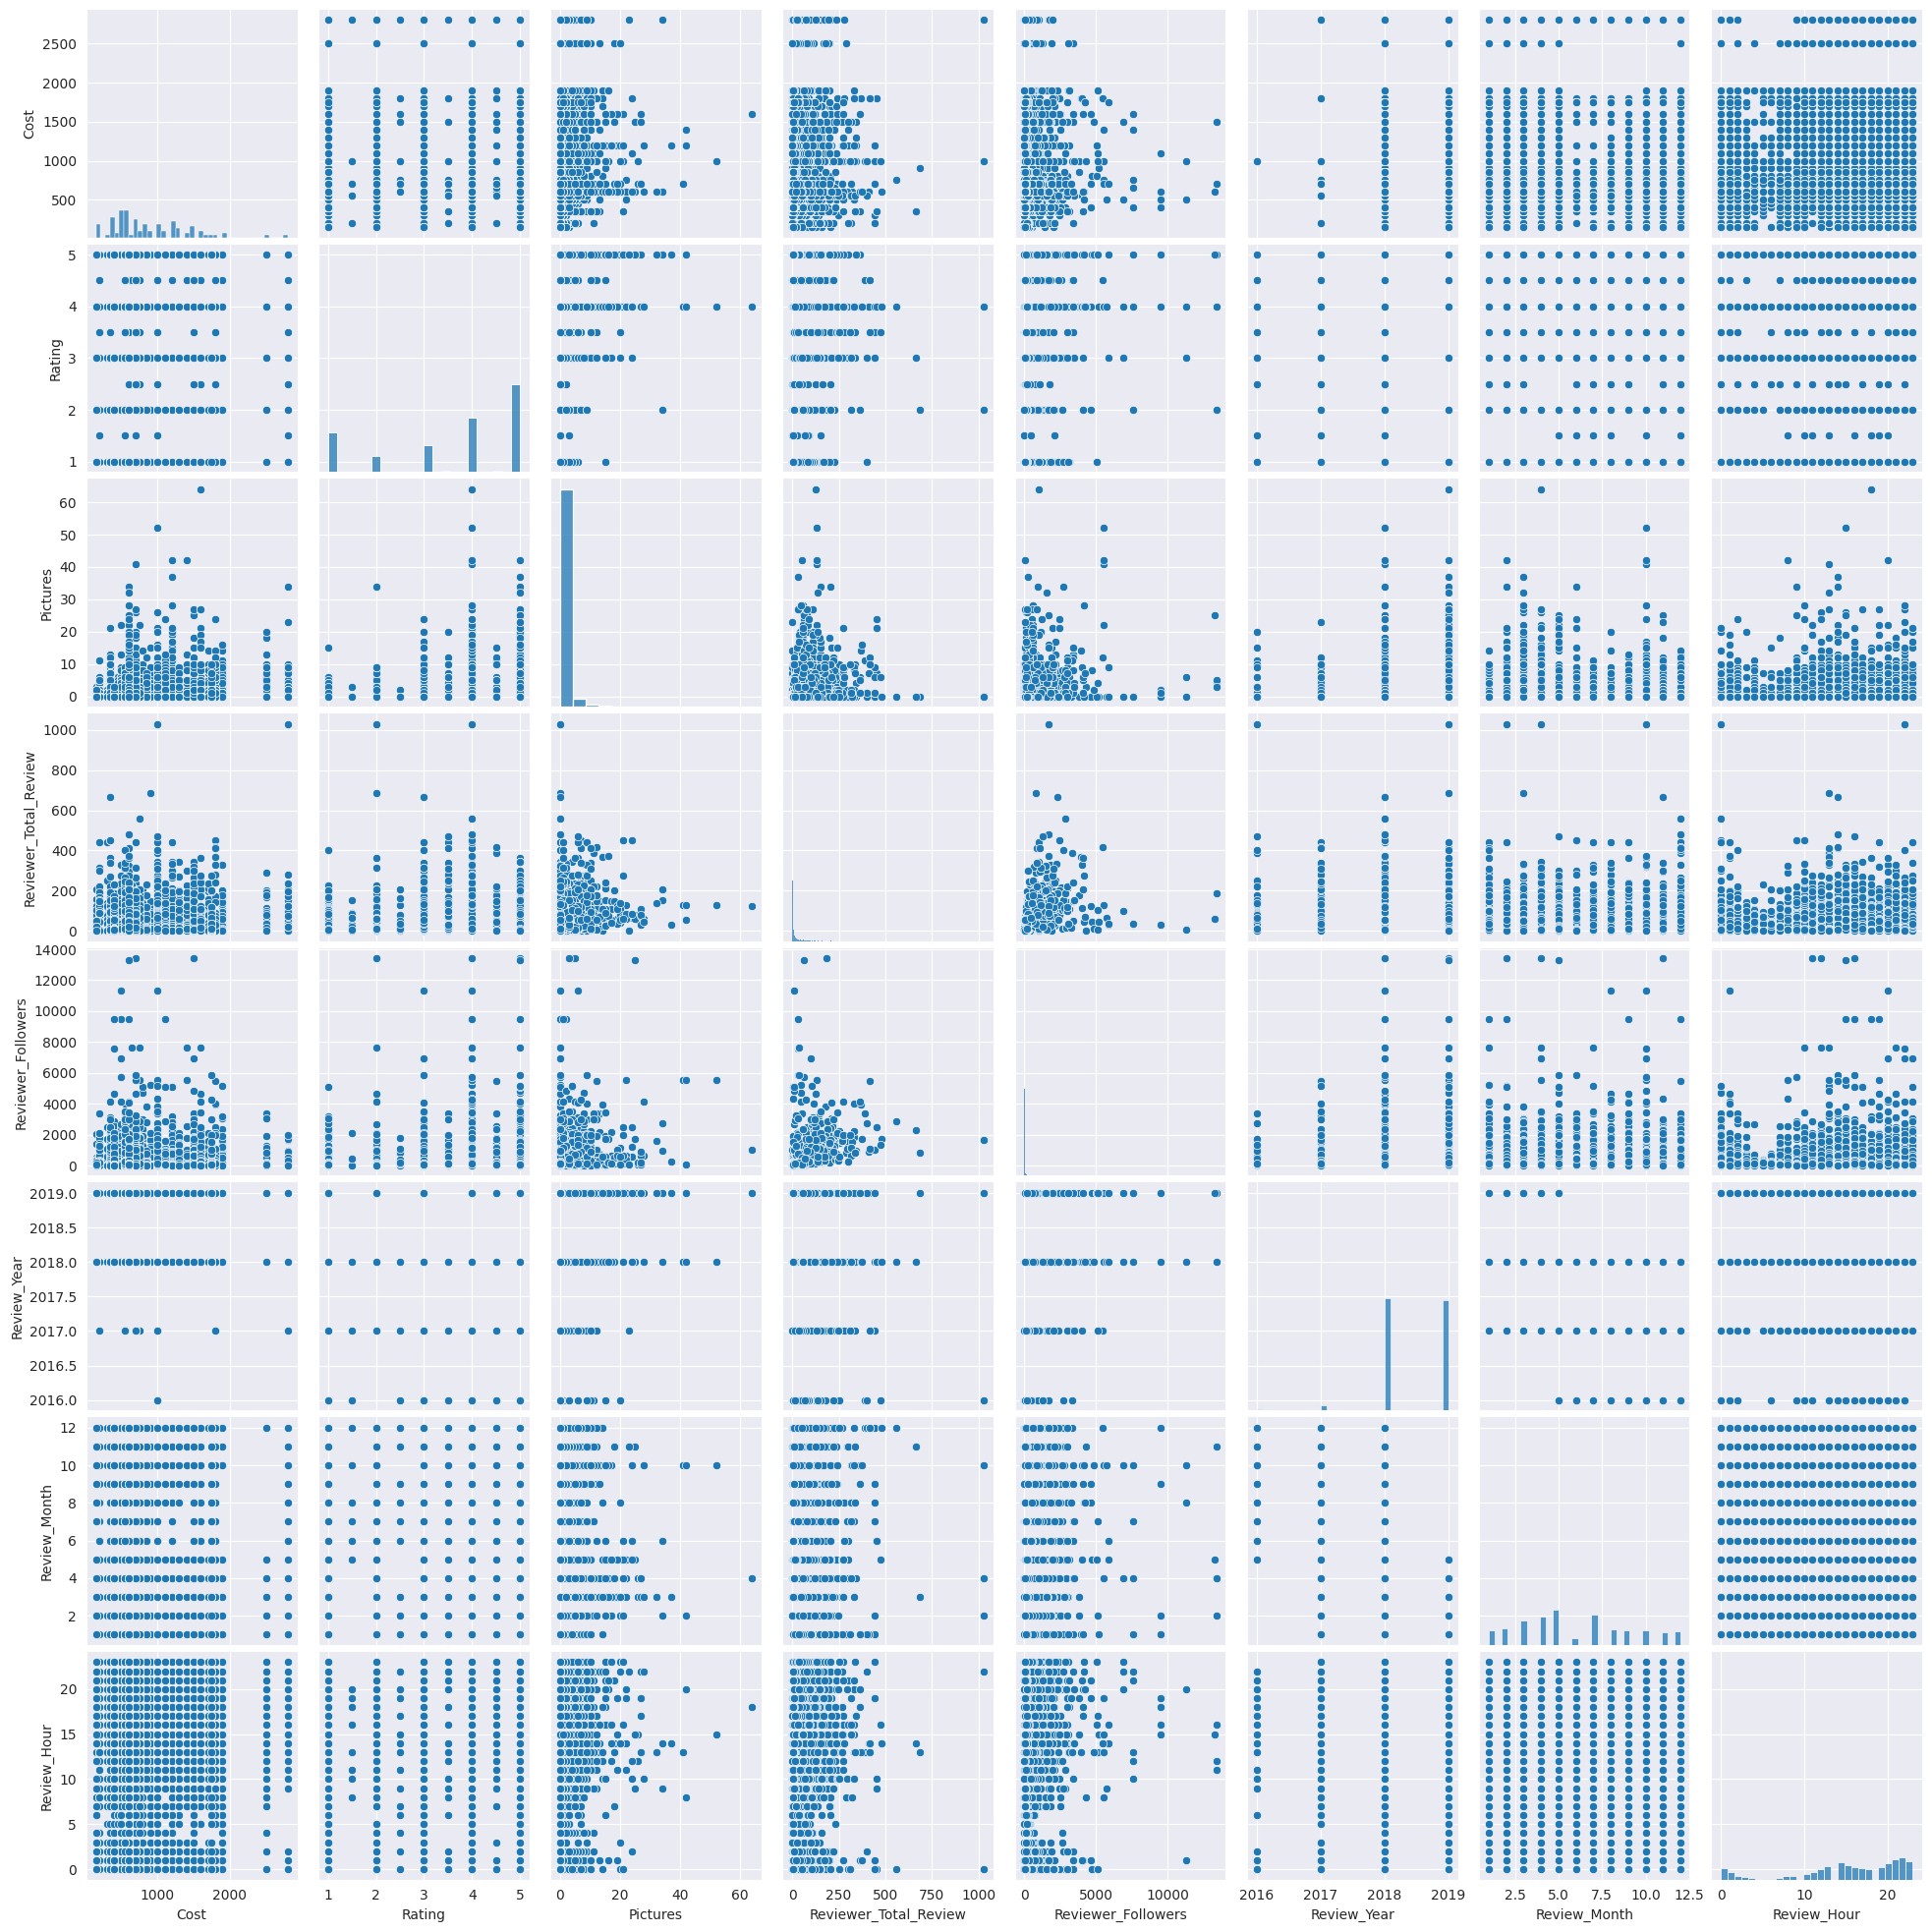

In [67]:
# Pair Plot visualization code
sns.pairplot(merged)



---


---





# Hypothesis Testing

We have made 3 hypothesis -



1.   The cost of a restaurant is positively coorelated with the rating it recieves.
2.   Restaurants are reviewed by reviewers with more followers will have a higher rating.
3.  Restauranats that offer a wider variety of cuisines will have higher rating.





---



## Hypothetical statement - 1

The cost of a restaurant is positively coorelated with the rating it recieves.

**Null Hypothesis** - There is no relationnship between the cost of restaurant and rating it recieves.(H0: 𝛽1 = 0)

**Alternate Hypothesis** - There is a positive relationship between the cost of a restaurant and the rating it recieves.(H1: 𝛽1 > 0)

**Test** - Simple linear regression.

In [68]:
# Statical test to obtain p-value

import statsmodels.formula.api as smf


# fit linear model

model = smf.ols(formula ='Rating ~ Cost', data = merged).fit()

# check p value of coefficient

p_value = model.pvalues[1]
if p_value < 0.05:
  print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


In [69]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [70]:
pd.crosstab(merged['Cuisines'], merged['Rating'])

Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88
"American, Chinese, North Indian, Kebab, South Indian",18,0,4,0,14,0,24,0,40
"American, Fast Food, Salad, Burger",10,0,4,0,6,0,15,0,42
"American, Wraps, Desserts",14,0,7,0,19,0,27,0,33
"Andhra, Biryani, Hyderabadi, North Indian",24,0,8,0,8,0,17,0,43
...,...,...,...,...,...,...,...,...,...
"North Indian, South Indian",23,0,4,0,6,0,10,0,57
"Seafood, Goan, North Indian, Continental, Asian",5,0,5,0,5,0,33,0,52
"South Indian, North Indian, Chinese",44,0,13,0,26,0,48,0,69


In [71]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


#**Feature Engineering & Data Pre-processing**

**Treating Duplicates**

Since all the duplicated data has NaN values, hence dropping the entire values as it will not help and will create unnecessary noise.

In [72]:
#deleting duplicate value from review dataset
review = review.drop_duplicates()

In [73]:
#final check after dropping duplicates
print(f"Anymore duplicate left ? {review.duplicated().value_counts()}, unique values with {len(review[review.duplicated()])} duplication")

Anymore duplicate left ? False    9964
dtype: int64, unique values with 0 duplication


**Treating Missing values**

In [75]:
# Handling Missing Values & Missing Value Imputation
restaurant.isnull().sum()

Restaurant_Name     0
Links               0
Cost                0
Collections        54
Cuisines            0
Timings             1
dtype: int64

In [76]:
#checking the null value in timing
restaurant[restaurant['Timings'].isnull()]

,Restaurant_Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


In [78]:
#filling null value in timings column
restaurant.Timings.fillna(restaurant.Timings.mode()[0], inplace = True)

In [87]:
#checking null values in Collections from restauranats table

missing_percentage_of_collection= round(restaurant['Collections'].isnull().mean()*100)
print(f'Percentage of missing value in collection column is {missing_percentage_of_collection}%')

Percentage of missing value in collection column is 51%


In [89]:
#dropping collection column since has more than 50% of null values
restaurant.drop('Collections', axis = 1, inplace = True)

In [91]:
#final checking of missing value
restaurant.isnull().sum()

Restaurant_Name    0
Links              0
Cost               0
Cuisines           0
Timings            0
dtype: int64